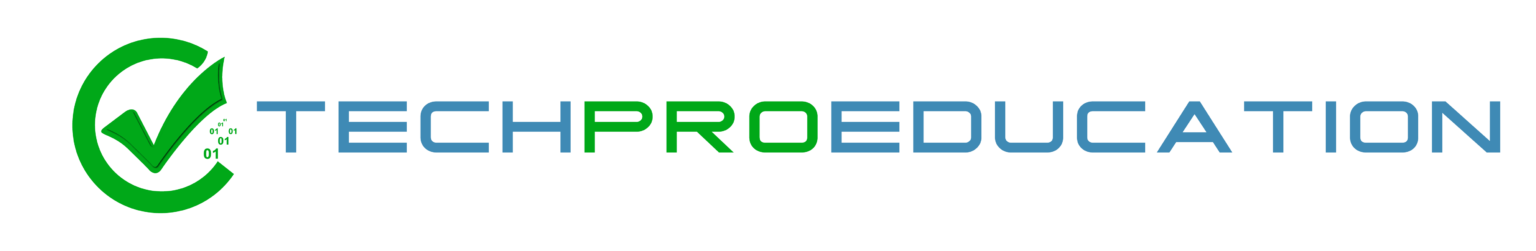

# **Adult Income Prediction**

**Data Set Information:**

This dataset was obtained from UCI Machine Learning Repository. The aim of this problem is to classify adults in two different groups based on their income where group 1 has an income less than USD 50k and group 2 has an income of more than or equal to USD 50k. The data available at hand comes from Census 1994.

**Attribute Information:**

Age: Describes the age of individuals. Continuous.

Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: Continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: Number of years spent in education. Continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: Continuous.

capital-loss: Continuous.

hours-per-week: Continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

salary: >50K,<=50K

**Data Set Information:**

Bu veri seti UCI Machine Learning Repository'den elde edilmiştir. Bu problemin amacı, yetişkinleri gelirlerine göre iki farklı grupta sınıflandırmaktır; grup 1'in geliri 50 bin ABD dolarından az ve grup 2'nin geliri 50 bin ABD dolarına eşit veya daha fazladır. Eldeki veriler 1994 Nüfus Sayımı'ndan gelmektedir.

**Öznitelik Bilgileri:**

Yaş: Bireylerin yaşını tanımlar. Sürekli.

Çalışma Sınıfı: Özel, Kendi hesabına çalışmayan, Kendi hesabına çalışan, Federal hükümet, Yerel hükümet, Devlet hükümeti, Ücretsiz, Hiç çalışmamış.

fnlwgt: Sürekli.

Eğitim: Sürekli: Lisans, Bazı üniversite, 11., Lise mezunu, Prof-okul, Doç-acdm, Doç-voc, 9., 7-8., 12., Yüksek Lisans, 1-4., 10., Doktora, 5-6., Okul öncesi.

eğitim-num: Eğitimde geçirilen yıl sayısı. Sürekli.

medeni durum: Evli-eşi var, Boşanmış, Hiç evlenmemiş, Ayrılmış, Dul, Evli-eşi yok, Evli-AF-eşi var.

Meslek: Teknik destek: Teknik-destek, Zanaat-tamir, Diğer-hizmet, Satış, Yönetici-yönetici, Profesyonel-uzmanlık, İşleyiciler-temizleyiciler, Makine-op-inspct, Yönetici-büro, Çiftçilik-balıkçılık, Nakliye-hareket, Özel-ev-hizmeti, Koruyucu-hizmet, Silahlı-Kuvvetler.

ilişki: Karı, Kendi-çocuğu, Koca, Aile-içi değil, Diğer-akraba, Evli değil.

Irk: Beyaz: Beyaz, Asya-Pasifik-İskandinav, Amerikan-Kızılderili-Eskimo, Diğer, Siyah.

Cinsiyet: Kadın, Erkek: Kadın, Erkek.

sermaye kazancı: Sürekli.

Sermaye kaybı: Sürekli.

Haftalık çalışma saati: Sürekli.

anavatan-ülke: Birleşik Devletler, Kamboçya, İngiltere, Porto Riko, Kanada, Almanya, Dış-ABD (Guam-USVI- vb.), Hindistan, Japonya, Yunanistan, Güney, Çin, Küba, İran, Honduras, Filipinler, İtalya, Polonya, Jamaika, Vietnam, Meksika, Portekiz, İrlanda, Fransa, Dominik Cumhuriyeti, Laos, Ekvador, Tayvan, Haiti, Kolombiya, Macaristan, Guatemala, Nikaragua, İskoçya, Tayland, Yugoslavya, El-Salvador, Trinadad&Tobago, Peru, Hong, Holanda-Hollanda.

Maaş: >50K, <=50K

Translated with DeepL.com (free version)

# Exploratory Data Analysis and Visualization

In [1]:
!pip install cufflinks

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import cufflinks as cf   # !pip install cufflinks

from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import RocCurveDisplay, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv("adult.csv")
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.shape

(32561, 15)

In [5]:
df.duplicated().sum()

24

In [6]:
# Veri setindeki yinelenen gözlemleri kontrol eder ve bunları kaldırır

def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep='first').sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep='first', inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

In [7]:
duplicate_values(df)

Duplicate check...
There are 24 duplicated observations in the dataset.
24 duplicates were dropped!
No more duplicate rows!


In [8]:
df.duplicated().sum()

0

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education.num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital.gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital.loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours.per.week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


In [10]:
df.replace('?', np.nan, inplace=True)

In [11]:
df.head(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       30701 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education.num   32537 non-null  int64 
 5   marital.status  32537 non-null  object
 6   occupation      30694 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital.gain    32537 non-null  int64 
 11  capital.loss    32537 non-null  int64 
 12  hours.per.week  32537 non-null  int64 
 13  native.country  31955 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [13]:
null_counts = df.isna().sum()
null_counts

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64

In [14]:
mod_value = df['workclass'].mode()[0]
df['workclass'].fillna(mod_value, inplace=True)

In [15]:
mod_value = df['occupation'].mode()[0]
df['occupation'].fillna(mod_value, inplace=True)

In [16]:
value_country= df['native.country'].value_counts()
value_country

native.country
United-States                 29153
Mexico                          639
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France       

In [17]:
df["native.country"] = df["native.country"].fillna("United-States")

In [18]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [19]:
df.select_dtypes(include ="object").head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
0,Private,HS-grad,Widowed,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
2,Private,Some-college,Widowed,Prof-specialty,Unmarried,Black,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K


In [20]:
for col in df.select_dtypes('object'):
    print(f"{col:<20}:", df[col].nunique())

workclass           : 8
education           : 16
marital.status      : 7
occupation          : 14
relationship        : 6
race                : 5
sex                 : 2
native.country      : 41
income              : 2


In [21]:
df.income.value_counts()

income
<=50K    24698
>50K      7839
Name: count, dtype: int64

In [22]:
df_numeric = ['age','fnlwgt','education.num','capital.gain','capital.loss','hours.per.week','income']

df_nonnumeric = ['workclass','education','marital.status', 'occupation', 'relationship', 'race', 'sex', 'native']

# BURAYA BAK - ÖNEMLİ

df_nonnumeric(df, df_nonnumeric) #BURAYA BAK
#ordinal encoding kullan maaşların kategorilendirmesinde

In [23]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1, '<=50K.': 0, '>50K.': 1})
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0


In [24]:
df.income.value_counts()

income
0    24698
1     7839
Name: count, dtype: int64

In [25]:
df.income.value_counts()

income
0    24698
1     7839
Name: count, dtype: int64

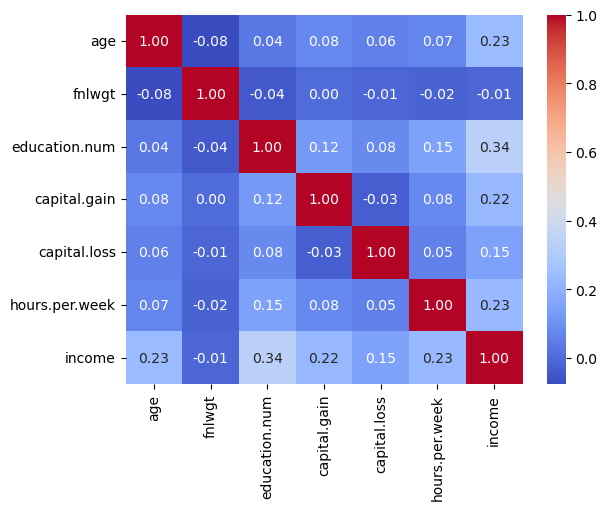

In [26]:
corr = sns.heatmap(df[df_numeric].corr(),annot=True, fmt = ".2f", cmap = "coolwarm")
plt.show()

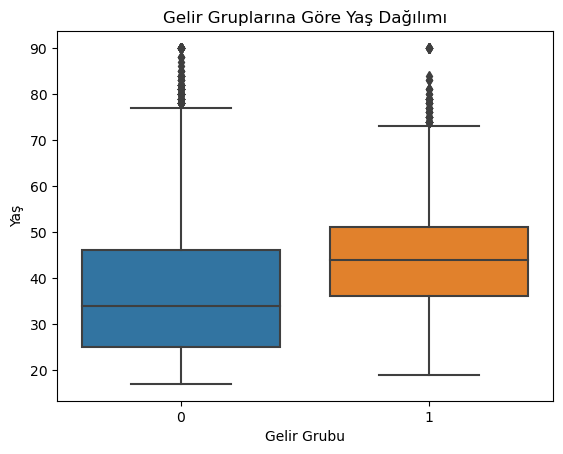

In [27]:
sns.boxplot(x='income', y='age', data=df)

plt.title('Gelir Gruplarına Göre Yaş Dağılımı')
plt.xlabel('Gelir Grubu')
plt.ylabel('Yaş')

plt.show()

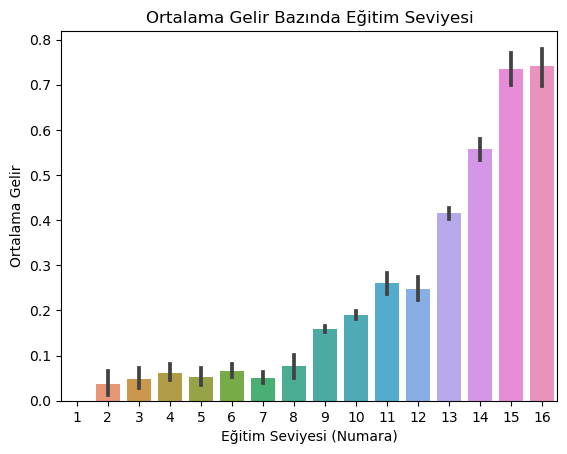

In [28]:
sns.barplot(x='education.num', y='income', data=df)


plt.title('Ortalama Gelir Bazında Eğitim Seviyesi')
plt.xlabel('Eğitim Seviyesi (Numara)')
plt.ylabel('Ortalama Gelir')


plt.show()

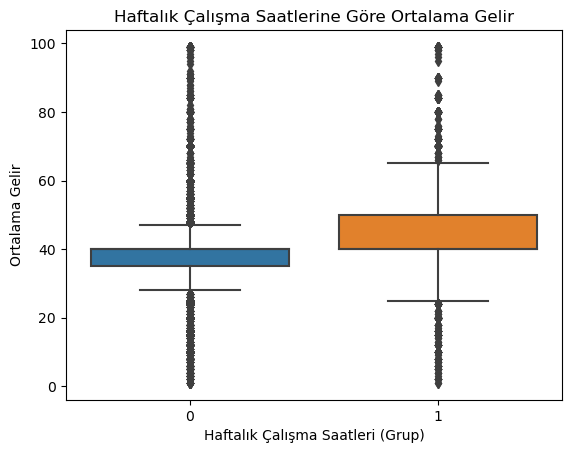

In [29]:
sns.boxplot(x='income', y='hours.per.week', data=df)

plt.title('Haftalık Çalışma Saatlerine Göre Ortalama Gelir')
plt.xlabel('Haftalık Çalışma Saatleri (Grup)')
plt.ylabel('Ortalama Gelir')

plt.show()

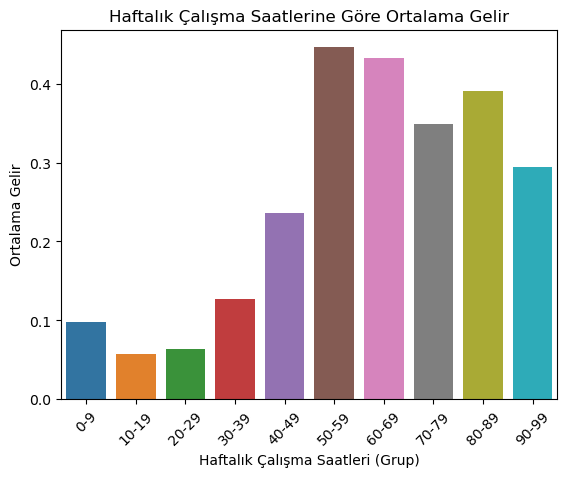

In [30]:
# Çalışma saatlerini gruplara ayırın (örneğin: 0-10, 11-20, ... )
bins = list(range(0, df['hours.per.week'].max() + 10, 10))
labels = [f"{i}-{i + 9}" for i in range(0, max(bins), 10)]
df['hours_per_week_group'] = pd.cut(df['hours.per.week'], bins=bins, labels=labels, right=False)

# Çalışma saat gruplarına göre ortalama geliri çubuk grafiği ile görselleştirin
sns.barplot(x='hours_per_week_group', y='income', data=df, ci=None)

# Grafik ayarlarını yapın
plt.xticks(rotation=45)
plt.title('Haftalık Çalışma Saatlerine Göre Ortalama Gelir')
plt.xlabel('Haftalık Çalışma Saatleri (Grup)')
plt.ylabel('Ortalama Gelir')

# Grafiği göster
plt.show()

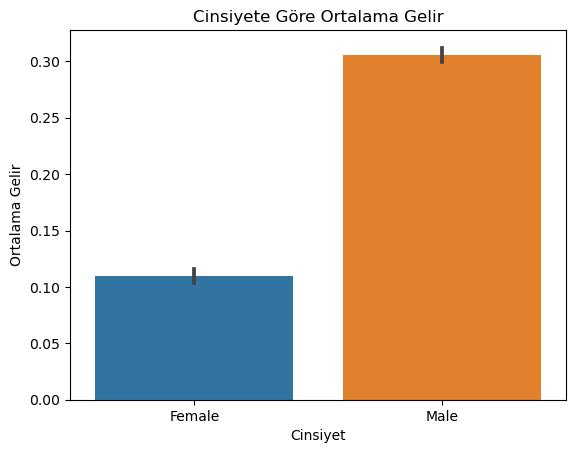

In [31]:
sns.barplot(x='sex', y='income', data=df)

plt.title('Cinsiyete Göre Ortalama Gelir')
plt.xlabel('Cinsiyet')
plt.ylabel('Ortalama Gelir')

plt.show()

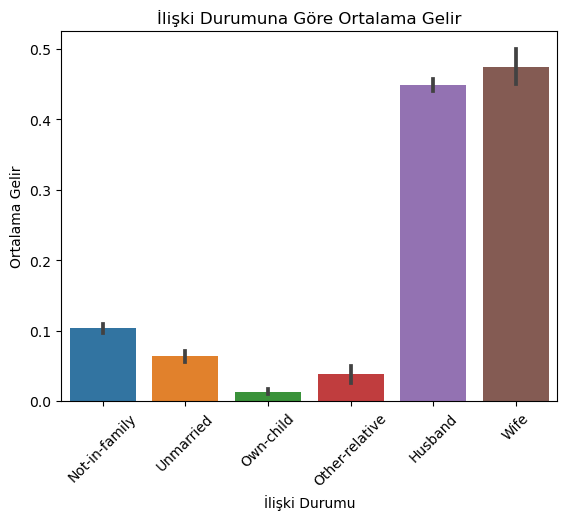

In [32]:
sns.barplot(x='relationship', y='income', data=df)

plt.title('İlişki Durumuna Göre Ortalama Gelir')
plt.xlabel('İlişki Durumu')
plt.ylabel('Ortalama Gelir')

plt.xticks(rotation=45)
plt.show()

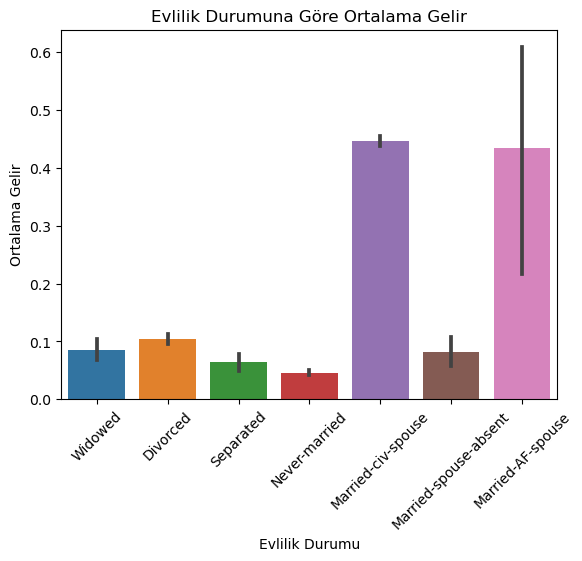

In [33]:
sns.barplot(x='marital.status', y='income', data=df)

plt.title('Evlilik Durumuna Göre Ortalama Gelir')
plt.xlabel('Evlilik Durumu')
plt.ylabel('Ortalama Gelir')

plt.xticks(rotation=45)
plt.show()

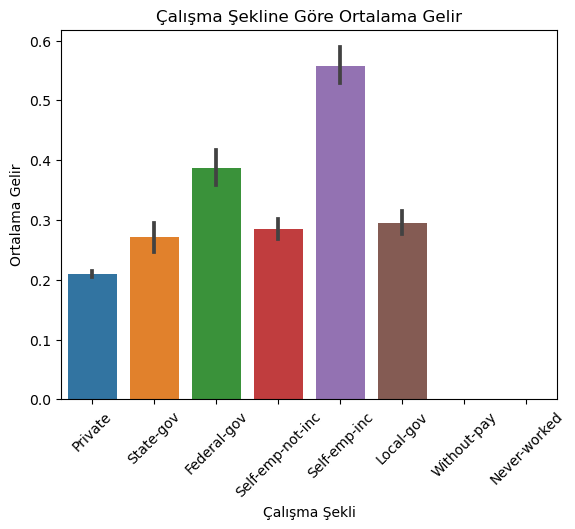

In [34]:
sns.barplot(x='workclass', y='income', data=df)

plt.title('Çalışma Şekline Göre Ortalama Gelir')
plt.xlabel('Çalışma Şekli')
plt.ylabel('Ortalama Gelir')

plt.xticks(rotation=45)
plt.show()

In [35]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,hours_per_week_group
0,90,Private,77053,HS-grad,9,Widowed,Prof-specialty,Not-in-family,White,Female,0,4356,40,United-States,0,40-49
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0,10-19
2,66,Private,186061,Some-college,10,Widowed,Prof-specialty,Unmarried,Black,Female,0,4356,40,United-States,0,40-49
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0,40-49
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0,40-49


# Feature Engineering

In [36]:
df["sex"] = df["sex"].map({"Male": 0, "Female": 1})

# Evlilik durumunu ikili olarak Oluştur - Evet(1) veya Hayır(0)
df["marital.status"] = df["marital.status"].replace(['Never-married','Divorced','Separated','Widowed'], 'Single')
df["marital.status"] = df["marital.status"].replace(['Married-civ-spouse','Married-spouse-absent','Married-AF-spouse'], 'Married')
df["marital.status"] = df["marital.status"].map({"Married": 1, "Single": 0})
df["marital.status"] = df["marital.status"].astype(int)

# Kullanmak istemediğiniz verileri çıkarın
df.drop(labels=["workclass", "education", "occupation", "relationship", "race", "native.country"], axis=1, inplace=True)
print('Dropped Labels with df')
print(df.head())

Dropped Labels with df
   age  fnlwgt  education.num  marital.status  sex  capital.gain  \
0   90   77053              9               0    1             0   
1   82  132870              9               0    1             0   
2   66  186061             10               0    1             0   
3   54  140359              4               0    1             0   
4   41  264663             10               0    1             0   

   capital.loss  hours.per.week  income hours_per_week_group  
0          4356              40       0                40-49  
1          4356              18       0                10-19  
2          4356              40       0                40-49  
3          3900              40       0                40-49  
4          3900              40       0                40-49  


In [37]:
value_country= df['marital.status'].value_counts()
value_country

marital.status
0    17126
1    15411
Name: count, dtype: int64

In [38]:
value_country= df['sex'].value_counts()
value_country

sex
0    21775
1    10762
Name: count, dtype: int64

In [39]:
df.head()

,age,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,income,hours_per_week_group
0,90,77053,9,0,1,0,4356,40,0,40-49
1,82,132870,9,0,1,0,4356,18,0,10-19
2,66,186061,10,0,1,0,4356,40,0,40-49
3,54,140359,4,0,1,0,3900,40,0,40-49
4,41,264663,10,0,1,0,3900,40,0,40-49


In [40]:
df.drop(["hours_per_week_group"], axis=1, inplace=True)

# Model Tanımlama

In [41]:
X = df.drop(["income"], axis=1)
y = df["income"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

# Logistic Regression

In [43]:
scaler = StandardScaler()

In [44]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [45]:
log_model = LogisticRegression()

In [46]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [47]:
log_model.coef_

array([[ 0.3649759 ,  0.06942371,  0.92788733,  1.17720509, -0.07629442,
         2.33429912,  0.2803613 ,  0.38422386]])

## Logistic Regression with Pipeline

In [48]:
scaler = StandardScaler()

In [49]:
log_model = LogisticRegression()

In [50]:
log_pipe = Pipeline([("scaler",scaler),("log_model",log_model)]) 

In [51]:
log_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log_model', LogisticRegression())])

In [52]:
y_pred = log_pipe.predict(X_test)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [53]:
y_pred_proba = log_pipe.predict_proba(X_test)
y_pred_proba

array([[0.80558984, 0.19441016],
       [0.48006388, 0.51993612],
       [0.55698049, 0.44301951],
       ...,
       [0.99745591, 0.00254409],
       [0.96369283, 0.03630717],
       [0.99095332, 0.00904668]])

In [54]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data


,age,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,income
21111,39,163057,10,0,0,0,0,99,0
21478,35,183800,13,1,0,0,0,40,1
20824,31,114937,13,1,0,0,0,35,0
22147,67,116517,13,0,1,0,0,35,0
11438,56,249368,9,1,0,0,0,70,0
...,...,...,...,...,...,...,...,...,...
13818,44,106682,9,1,0,0,0,60,0
12210,54,329266,9,1,0,0,0,44,1
27095,37,217838,3,0,1,0,0,40,0
1260,21,301408,10,0,1,0,1602,22,0


In [55]:
test_data["pred_proba"] = y_pred_proba[:,1]
test_data

,age,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,income,pred_proba
21111,39,163057,10,0,0,0,0,99,0,0.194410
21478,35,183800,13,1,0,0,0,40,1,0.519936
20824,31,114937,13,1,0,0,0,35,0,0.443020
22147,67,116517,13,0,1,0,0,35,0,0.143892
11438,56,249368,9,1,0,0,0,70,0,0.545085
...,...,...,...,...,...,...,...,...,...,...
13818,44,106682,9,1,0,0,0,60,0,0.366558
12210,54,329266,9,1,0,0,0,44,1,0.346738
27095,37,217838,3,0,1,0,0,40,0,0.002544
1260,21,301408,10,0,1,0,1602,22,0,0.036307


In [56]:
test_data["pred"] = y_pred
test_data

,age,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,income,pred_proba,pred
21111,39,163057,10,0,0,0,0,99,0,0.194410,0
21478,35,183800,13,1,0,0,0,40,1,0.519936,1
20824,31,114937,13,1,0,0,0,35,0,0.443020,0
22147,67,116517,13,0,1,0,0,35,0,0.143892,0
11438,56,249368,9,1,0,0,0,70,0,0.545085,1
...,...,...,...,...,...,...,...,...,...,...,...
13818,44,106682,9,1,0,0,0,60,0,0.366558,0
12210,54,329266,9,1,0,0,0,44,1,0.346738,0
27095,37,217838,3,0,1,0,0,40,0,0.002544,0
1260,21,301408,10,0,1,0,1602,22,0,0.036307,0


In [57]:
test_data.sample(10)

,age,fnlwgt,education.num,marital.status,sex,capital.gain,capital.loss,hours.per.week,income,pred_proba,pred
855,30,127651,9,1,0,0,1887,48,1,0.504354,1
14827,33,33404,9,0,0,0,0,65,1,0.043466,0
8406,34,207668,9,1,0,0,0,54,1,0.281634,0
30836,34,209213,9,1,0,0,0,40,0,0.202111,0
22713,29,140830,9,0,1,0,0,40,0,0.016756,0
10004,21,169003,8,0,0,0,0,25,0,0.007136,0
14157,31,37030,12,0,1,0,0,25,0,0.030075,0
10456,20,201766,10,0,1,0,0,35,0,0.016808,0
9324,24,190293,13,0,1,0,0,40,0,0.061179,0
28225,67,150516,4,1,0,0,0,24,0,0.055660,0


## Model Performance

In [58]:
accuracy_score(y_test,y_pred)

0.8394283958205285

In [59]:
log_pipe.score(X_test, y_test)

0.8394283958205285

In [60]:
precision_score(y_test, y_pred, pos_label=1)

0.713121434392828

In [61]:
precision_score(y_test, y_pred, pos_label=0)

0.868774853247491

In [62]:
recall_score(y_test, y_pred,  pos_label=1)

0.5580357142857143

In [63]:
recall_score(y_test, y_pred,  pos_label=0)

0.928744939271255

In [64]:
f1_score(y_test,y_pred, pos_label=1)

0.6261180679785331

In [65]:
f1_score(y_test,y_pred, pos_label=0)

0.8977595147245866

In [66]:
def eval_metric(model, X_train, y_train, X_test, y_test):

    """ to get the metrics for the model """

    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    
# hem train hem de test seti scorlarını gözlemleyebilmek için eval_metric fornksiyonumuzu tanımlıyoruz.

In [67]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test) 


Test_Set
[[4588  352]
 [ 693  875]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4940
           1       0.71      0.56      0.63      1568

    accuracy                           0.84      6508
   macro avg       0.79      0.74      0.76      6508
weighted avg       0.83      0.84      0.83      6508


Train_Set
[[18386  1372]
 [ 2771  3500]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     19758
           1       0.72      0.56      0.63      6271

    accuracy                           0.84     26029
   macro avg       0.79      0.74      0.76     26029
weighted avg       0.83      0.84      0.83     26029



## Cross Validation

In [68]:
from sklearn.metrics import get_scorer_names

scorers = get_scorer_names()
print(scorers)

['accuracy', 'adjusted_mutual_info_score', 'adjusted_rand_score', 'average_precision', 'balanced_accuracy', 'completeness_score', 'explained_variance', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'fowlkes_mallows_score', 'homogeneity_score', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted', 'matthews_corrcoef', 'max_error', 'mutual_info_score', 'neg_brier_score', 'neg_log_loss', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_gamma_deviance', 'neg_mean_poisson_deviance', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_median_absolute_error', 'neg_negative_likelihood_ratio', 'neg_root_mean_squared_error', 'neg_root_mean_squared_log_error', 'normalized_mutual_info_score', 'positive_likelihood_ratio', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'r2', 'rand_score', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'roc_auc',

In [69]:
model = Pipeline([("scaler",scaler),("log_model",log_model)])

scores = cross_validate(model, X_train, y_train, scoring = 
                        ['precision','recall','f1','accuracy'],
                        cv = 10, 
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,train_precision,test_recall,train_recall,test_f1,train_f1,test_accuracy,train_accuracy
1,0.046237,0.018999,0.731006,0.715260,0.567783,0.557229,0.639138,0.626432,0.845563,0.839879
2,0.045592,0.018344,0.713389,0.718601,0.543860,0.560595,0.617195,0.629840,0.837495,0.841245
3,0.049738,0.019587,0.705645,0.720440,0.558214,0.557052,0.623330,0.628297,0.837495,0.841202
4,0.047518,0.019003,0.722917,0.717716,0.553429,0.561304,0.626920,0.629946,0.841337,0.841117
5,0.046986,0.019034,0.726496,0.718657,0.542265,0.557583,0.621005,0.627956,0.840569,0.840818
6,0.048029,0.018958,0.717213,0.718258,0.558214,0.558292,0.627803,0.628252,0.840569,0.840818
7,0.043706,0.020646,0.730612,0.717381,0.570973,0.557229,0.641003,0.627244,0.845947,0.840434
8,0.051566,0.017181,0.693676,0.719482,0.559809,0.560773,0.619594,0.630290,0.834422,0.841501
9,0.049861,0.018100,0.709939,0.717861,0.557325,0.559100,0.624442,0.628611,0.838264,0.840861
10,0.067260,0.024688,0.729730,0.717024,0.559809,0.556697,0.633574,0.626770,0.843966,0.840270


In [70]:
df_scores.mean()[2:]  

test_precision     0.718062
train_precision    0.718068
test_recall        0.557168
train_recall       0.558585
test_f1            0.627400
train_f1           0.628364
test_accuracy      0.840563
train_accuracy     0.840814
dtype: float64

In [71]:
eval_metric(log_pipe, X_train, y_train, X_test, y_test) 

Test_Set
[[4588  352]
 [ 693  875]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4940
           1       0.71      0.56      0.63      1568

    accuracy                           0.84      6508
   macro avg       0.79      0.74      0.76      6508
weighted avg       0.83      0.84      0.83      6508


Train_Set
[[18386  1372]
 [ 2771  3500]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     19758
           1       0.72      0.56      0.63      6271

    accuracy                           0.84     26029
   macro avg       0.79      0.74      0.76     26029
weighted avg       0.83      0.84      0.83     26029



## GridSearch CV

In [72]:
log_pipe.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('log_model', LogisticRegression())],
 'verbose': False,
 'scaler': StandardScaler(),
 'log_model': LogisticRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'log_model__C': 1.0,
 'log_model__class_weight': None,
 'log_model__dual': False,
 'log_model__fit_intercept': True,
 'log_model__intercept_scaling': 1,
 'log_model__l1_ratio': None,
 'log_model__max_iter': 100,
 'log_model__multi_class': 'auto',
 'log_model__n_jobs': None,
 'log_model__penalty': 'l2',
 'log_model__random_state': None,
 'log_model__solver': 'lbfgs',
 'log_model__tol': 0.0001,
 'log_model__verbose': 0,
 'log_model__warm_start': False}

In [73]:
from sklearn.model_selection import GridSearchCV

In [74]:
# pipeline for logistic regression

model = Pipeline([("scaler", scaler), ("log_model", log_model)])

# l1: Lasso, l2: Ridge
penalty = ["l1", "l2"]

# -1 ile 5 arasında 20 tane C değeri elde etmek için
# C arttıkça regülarizasyon düşer, alphanın tersi olarak
# C için np.logspace kullanmanın nedeni, regülarizasyonun optimal değerinin genellikle belirli bir aralıkta olmamasıdır.
# Bu nedenle, geniş bir aralıkta farklı değerleri denemek ve en iyi sonucu veren değeri bulmak için logaritmik bir ölçekte
# değerler oluşturmak mantıklıdır.
C = np.logspace(-1, 5, 20)

# balanced: sınıf ağırlıkları dengeli, None: sınıf ağırlığı yok
class_weight = ["balanced", None]
# dengesiz data setlerinde classları dengelemek için class_weight= "balanced" kullanabiliyoruz. Data dengelendiği zaman
# model az olan sınıfa ait precision scorunu artırarak o sınıfın recall scorunu artırmaya çalışır.

# solver ın dört değeri
solver = ["lbfgs", "liblinear", "sag", "saga"]

# penalty, C, class_weight ve solver'ın tüm kombinasyonlarını elde etmek için
param_grid = {
    "log_model__penalty": penalty,
    "log_model__C": [C, 1],  # hata alan alanlar "log_model__C" : C, yapsınlar
    "log_model__class_weight": class_weight,
    "log_model__solver": solver
}

# en iyi modeli elde etmek için
grid_model = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=10,
    scoring='accuracy',  # Default olarak 1 sınıfının scorunu max. eder    
    n_jobs=-1)  # bütün işlemciler burda çalışsın diye

In [75]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('log_model', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'log_model__C': [array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                                          1],
                         'log_model__class_weight': ['balanced', None],
                         'log_model__penalty': ['l1', 'l2'],
                         'log_model__solver': ['lbfgs', 'liblinear', 'sag',
                                               'saga']},
             scoring='accuracy')

In [76]:
grid_model.best_params_

{'log_model__C': 1,
 'log_model__class_weight': None,
 'log_model__penalty': 'l1',
 'log_model__solver': 'liblinear'}

In [77]:
grid_model.best_index_

25

In [78]:
grid_model.best_score_

0.8406394147591187

In [79]:
eval_metric(grid_model, X_train, y_train, X_test, y_test)  


Test_Set
[[4588  352]
 [ 693  875]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4940
           1       0.71      0.56      0.63      1568

    accuracy                           0.84      6508
   macro avg       0.79      0.74      0.76      6508
weighted avg       0.83      0.84      0.83      6508


Train_Set
[[18386  1372]
 [ 2771  3500]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     19758
           1       0.72      0.56      0.63      6271

    accuracy                           0.84     26029
   macro avg       0.79      0.74      0.76     26029
weighted avg       0.83      0.84      0.83     26029



# K-Nearest Neighbors (KNN) Classification

In [80]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [81]:
from sklearn.neighbors import KNeighborsClassifier

In [82]:
knn_model = KNeighborsClassifier(n_neighbors=2)

In [83]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=2)

In [84]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [85]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [86]:
pd.DataFrame(y_pred_proba)

,0,1
0,1.0,0.0
1,0.0,1.0
2,0.0,1.0
3,1.0,0.0
4,1.0,0.0
...,...,...
6503,1.0,0.0
6504,0.5,0.5
6505,1.0,0.0
6506,1.0,0.0


## Model Performance

In [87]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [88]:
confusion_matrix(y_test, y_pred)

array([[4694,  246],
       [ 928,  640]], dtype=int64)

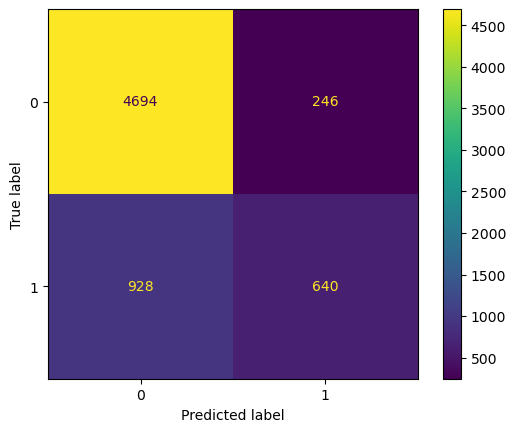

In [89]:
ConfusionMatrixDisplay.from_estimator(knn_model, X_test_scaled, y_test);

In [90]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4694  246]
 [ 928  640]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4940
           1       0.72      0.41      0.52      1568

    accuracy                           0.82      6508
   macro avg       0.78      0.68      0.71      6508
weighted avg       0.81      0.82      0.80      6508



In [91]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score

In [92]:
test_error_rates = []
train_error_rates = []

for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    y_pred_train = knn_model.predict(X_train_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)
    
    train_error = 1 - accuracy_score(y_train,y_pred_train)
    train_error_rates.append(train_error)

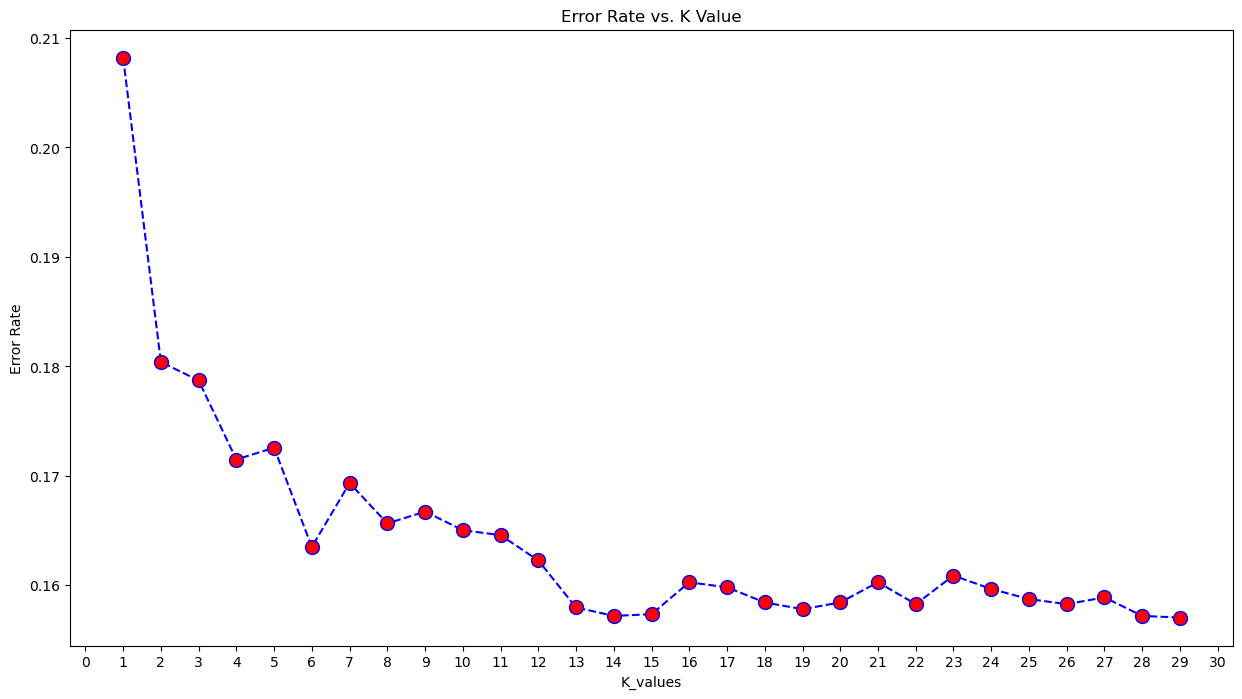

In [93]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')

plt.xticks(range(0, 31, 1));

In [94]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set\n")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set\n")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [95]:
knn = KNeighborsClassifier(n_neighbors=2)

knn.fit(X_train_scaled, y_train)
print("WITH K=2\n")

eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=2

Test_Set

[[4694  246]
 [ 928  640]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4940
           1       0.72      0.41      0.52      1568

    accuracy                           0.82      6508
   macro avg       0.78      0.68      0.71      6508
weighted avg       0.81      0.82      0.80      6508


Train_Set

[[19758     0]
 [ 2600  3671]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     19758
           1       1.00      0.59      0.74      6271

    accuracy                           0.90     26029
   macro avg       0.94      0.79      0.84     26029
weighted avg       0.91      0.90      0.89     26029



In [96]:
k_list = [2, 4, 6]
for i in k_list:
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(X_train_scaled,y_train)
    print(f'WITH K={i}\n')
    eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)
    print("______________________________________________________")

WITH K=2

Test_Set

[[4694  246]
 [ 928  640]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      4940
           1       0.72      0.41      0.52      1568

    accuracy                           0.82      6508
   macro avg       0.78      0.68      0.71      6508
weighted avg       0.81      0.82      0.80      6508


Train_Set

[[19758     0]
 [ 2600  3671]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     19758
           1       1.00      0.59      0.74      6271

    accuracy                           0.90     26029
   macro avg       0.94      0.79      0.84     26029
weighted avg       0.91      0.90      0.89     26029

______________________________________________________
WITH K=4

Test_Set

[[4643  297]
 [ 819  749]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      4940
           1       0.72      0.48      0.57  

## Cross Validate For Optimal K Value

In [97]:
from sklearn.model_selection import cross_val_score, cross_validate

In [98]:
model = KNeighborsClassifier(n_neighbors= 2)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv=10)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_accuracy,test_precision,test_recall,test_f1
1,0.087437,0.749739,0.827123,0.731070,0.446571,0.554455
2,0.065229,0.390658,0.812908,0.692308,0.401914,0.508577
3,0.074650,0.390319,0.820207,0.715447,0.421053,0.530120
4,0.071103,0.397242,0.820976,0.730659,0.406699,0.522541
5,0.073460,0.390714,0.814829,0.707736,0.393939,0.506148
6,0.067403,0.374110,0.820207,0.722689,0.411483,0.524390
7,0.071456,0.379161,0.820976,0.719346,0.421053,0.531187
8,0.065715,0.382522,0.809066,0.675676,0.398724,0.501505
9,0.079328,0.370849,0.822512,0.723118,0.428344,0.538000
10,0.060772,0.355335,0.823597,0.727027,0.429027,0.539619


In [99]:
df_scores.mean()[2:]

test_accuracy     0.819240
test_precision    0.714508
test_recall       0.415881
test_f1           0.525654
dtype: float64

In [100]:
knn_model = KNeighborsClassifier(n_neighbors=6)

## Gridsearch Method for Chosing Reasonable K Value

In [101]:
from sklearn.model_selection import GridSearchCV

In [110]:
knn_grid_model = KNeighborsClassifier(n_jobs=-1)

In [111]:
knn_grid = KNeighborsClassifier()

In [112]:
n_neighbors = range(1, 30) # k_values

In [113]:
param_grid = {"n_neighbors":n_neighbors, "p": [1, 2], "weights": ["uniform", "distance"]}

In [114]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv = 10, scoring = "accuracy")

In [ ]:
knn_grid_model.best_params_

In [116]:
knn_grid_model.fit(X_train_scaled, y_train)

KeyboardInterrupt: 

In [ ]:
print("WITH K=2\n")
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

## GridSearch on Pipeline

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
steps = [("Scaler", StandardScaler()), ("knn", KNeighborsClassifier())]

In [ ]:
Pipeline(steps = steps)

In [ ]:
pipe_model = Pipeline(steps=steps)

In [ ]:
pipe_model.fit(X_train, y_train)

In [ ]:
y_pred = pipe_model.predict(X_test)
y_pred

In [ ]:
from sklearn.metrics import precision_recall_curve, roc_curve, ConfusionMatrixDisplay, RocCurveDisplay, roc_auc_score

In [ ]:
ConfusionMatrixDisplay.from_estimator(pipe_model, X_test, y_test);

In [ ]:
print(classification_report(y_test, y_pred))

In [ ]:
pipe_model.get_params()

In [ ]:
pipe_model.set_params(knn__n_neighbors = 28)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
steps = [("Scaler", StandardScaler()), ("knn", KNeighborsClassifier())]

In [ ]:
param_grid = {"knn__n_neighbors": range(1, 30), "knn__p":[1,2], "knn__weights":["uniform", "distance"]}
pipe_model = Pipeline(steps = steps)

In [ ]:
pipe_grid = GridSearchCV(pipe_model, param_grid, cv = 10, scoring = "f1")
pipe_grid.fit(X_train, y_train)

In [ ]:
pipe_grid.best_params_

In [ ]:
pipe_grid.best_score_

In [ ]:
steps = [("Scaler", StandardScaler()), ("knn", KNeighborsClassifier(n_neighbors=21))]
model = Pipeline(steps = steps)

scores = cross_validate(model, X_train, y_train, scoring = ["precision", "recall", "f1", "accuracy"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

# Support Vector Classifier

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [ ]:
svm_model = SVC(random_state = 42)
svm_model.fit(X_train, y_train)
eval_metric(svm_model, X_train, y_train, X_test, y_test)

In [ ]:
from sklearn.model_selection import cross_validate

model = SVC(random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision", "recall", "f1"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

In [ ]:
param_grid = {"SVC__C": [0.001, 0.05, 0.01, 0.1],
             "SVC__gamma":["scale", "auto", 0.2, 0.3],
             "SVC__kernel":["rbf", "linear"]}

In [ ]:

steps = [("scaler", StandardScaler()), ("SVC", SVC(probability=True, class_weight="balanced", random_state = 42))]
pipe_model = Pipeline(steps=steps)

svm_grid_model = GridSearchCV(pipe_model, param_grid, scoring ="recall", cv=10)

In [ ]:
svm_grid_model.fit(X_train, y_train, n_jobs=-1)

In [ ]:
svm_grid_model.best_params_

In [ ]:
pd.DataFrame(svm_grid_model.cv_results_)

In [ ]:
svm_grid_model.best_index_

In [ ]:
svm_grid_model.best_score_